# A Jupyter notebook for first task with Jupyter

Load the libraries and define first functions

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [27]:
def get_df(year):
    return pd.read_csv('00_sources/Environmental_Data_Deep_Moor_{}.csv'.format(year))

In [30]:
def monthly_avg_calc(month, column):
    return df[df['date'].str.contains('201[2345]_[0]?' + str(month))][column].mean()

In [32]:
def yearly_avg(category):
    return list(map(lambda m: monthly_avg_calc(m, category), range(1,13)))


Start creating first charts

## Monthly air temperature for Year 2013

read the data .csv file for Year 2013

In [41]:
df = get_df('2013')

generate plot based on 2013 data

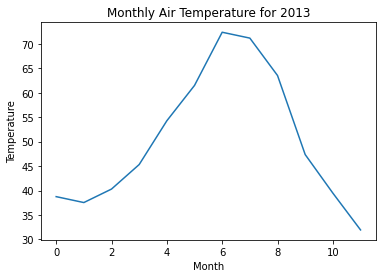

In [40]:
plt.plot(yearly_avg('Air_Temp'))
plt.title('Monthly Air Temperature for 2013')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

## Monthly air temperature for Year 2014

In [44]:
df = get_df('2014')

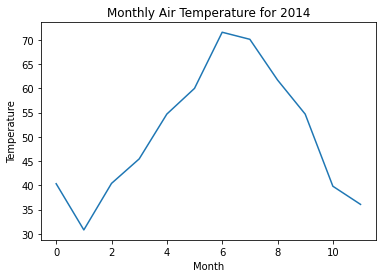

In [45]:
plt.plot(yearly_avg('Air_Temp'))
plt.title('Monthly Air Temperature for 2014')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

## Monthly air temperature for Year 2015

In [46]:
df = get_df('2015')

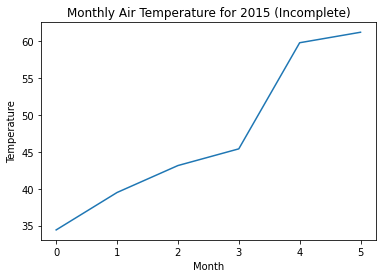

In [48]:
plt.plot(yearly_avg('Air_Temp'))
plt.title('Monthly Air Temperature for 2015 (Incomplete)')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

*The data is not full for year 2015 hence the lower average

## 2013-2015 Yearly Average Temperature Bar Chart

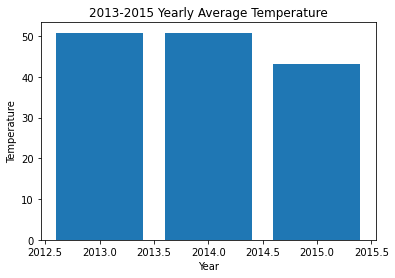

In [94]:
def get_years(years):
    full_period=[];
    for i in years:
        df = get_df(i)
        full_period.append(df)
    return full_period

years = [2013, 2014, 2015]


heights = [year['Air_Temp'].mean() for year in full_period]

plt.bar(years, heights)
plt.title('2013-2015 Yearly Average Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()


*The data is not full for year 2015 hence the lower average

# Bar Chart + Table with Min/Max Yearly Temperature

In [95]:
def max_temp(s):
    return s[s['Air_Temp']==s['Air_Temp'].max()]
def min_temp(s):
    return s[s['Air_Temp']==s['Air_Temp'].min()]


In [96]:
def min_man_temps(arr):
    return [(max_temp(s)['Air_Temp'].values[0],
             max_temp(s)['date'].values[0],
             min_temp(s)['Air_Temp'].values[0],
             min_temp(s)['date'].values[0]
        ) for s in get_years(arr)]


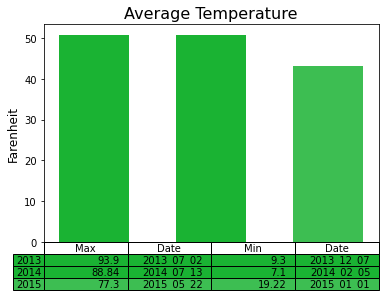

In [97]:
alphas = [height/max(heights) for height in heights]
colors = [(.1,.7,.2,a) for a in alphas]
plt.bar(years, heights, .6, color=colors)
plt.ylabel('Farenheit', fontsize=12)
plt.title('Average Temperature', fontsize=16)
plt.xticks(np.arange(2013,2016,1), rotation=60, fontsize=12)
columns = ['Max', 'Date', 'Min', 'Date']
plt.table(cellText=min_man_temps(years),
         rowLabels=years,
         colLabels=columns,
         rowColours=colors,
         cellColours=[[c]*4 for c in colors])
plt.xticks([])

plt.show()


Code creates a bar chart and a table with max/min temperatures for each year and the dates when they happened